In [1]:
import os
import cv2
from matplotlib import pyplot as plt 
import numpy as np
import sklearn
import math
import random
inlier = -1
pBarLength = 70

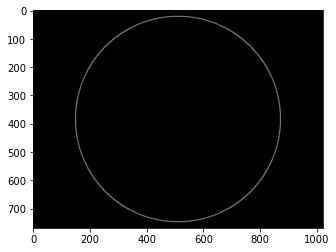

In [2]:
image = cv2.imread('circle.jpg')
imagg = cv2.imread('circle.jpg')
X = image.shape[0]
Y = image.shape[1]
image = cv2.Canny(image,50,100)
plt.imshow(image,cmap = 'gray')
pcir = []
for i in range(X):
    for j in range(Y):
        if image[i,j] == 255:
            pcir.append([i,j])

In [11]:
def Centrep(img):
    a,b,c,d,k1,k2 = 0,0,0,0,0,0
    R = random.sample(pcir,3)
    t1,t2,t3,t4,t5,t6 = R[0][0],R[0][1],R[1][0],R[1][1],R[2][0],R[2][1]
    while abs(a == 0) or abs(b == 0) or abs(c == 0) or abs(d == 0):
        R = random.sample(pcir,3)
        t1,t2,t3,t4,t5,t6 = R[0][0],R[0][1],R[1][0],R[1][1],R[2][0],R[2][1]
        a = (t1-t3)
        b = (t3-t5)
        c = (t2-t4)
        d = (t4-t6)
    k1 = -1/(c/a)
    k2 = -1/(d/b)
    m1 = (t1+t3)/2
    m2 = (t3+t5)/2
    m3 = (t2+t4)/2
    m4 = (t4+t6)/2
    midp1 = (m1,m3)
    midp2 = (m2,m4)
    k1 = -1/(c/a)
    k2 = -1/(d/b)
    b1 = (m3 - k1*m1)
    b2 = (m4 - k2*m2)
    xp = (b1 - b2)/(k2-k1)
    yp = k1*xp + b1
    cen = (xp,yp)
    return cen

def Rad(cp):
    R = random.sample(pcir,1)
    a = math.pow((R[0][0]-cp[0]),2)
    b = math.pow((R[0][1]-cp[1]),2)
    c = math.sqrt(a+b)
    return c

def dist(centre,point):
    return math.sqrt(pow((centre[0] - point[0]),2) + pow((centre[1] - point[1]),2))

(511, 382)
364


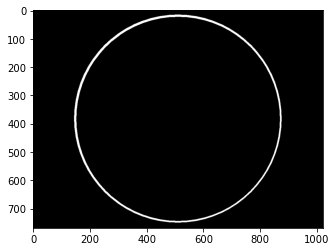

In [12]:
for z in range(0,1):
    Centre = Centrep(image)
    r = Rad(Centre)
    rad = int(r)
    Centre = (int(Centre[1]),int(Centre[0]))
    print(Centre)
    print(rad)
Circle = cv2.circle(image, (Centre), rad, (255,0,0), 4)
plt.imshow(Circle,cmap = 'gray')

In [13]:
def TRP(ram):
    x1 = 0
    y1 = 0
    x2 = 0
    y2 = 0
    while abs(x1 == 0) or abs(x2 == 0) or abs(y1 == 0) or abs(y2 == 0):
        val = random.sample(ram,3)
        x1 = (val[0][0] - val[1][0]) 
        y1 = (val[0][1] - val[1][1]) 
        x2 = (val[1][0] - val[2][0]) 
        y2 = (val[1][1] - val[2][1])
    return val 

def Check(image,X,Y):
    check = []
    for i in range(X):
        for j in range(Y):
            if image[i,j] == 255:
                check.append([i,j])
    return check
   
def Inlier(check,cirp):
    inlier = 0
    inlier = len([x for x in check if x in cirp])
    return inlier

def Post(point):
    Mean = np.mean(point,axis=0)
    Rad = []
    for pcir in point:
        dissqr = pow((Mean[0] - pcir[0]),2) + pow((Mean[1] - pcir[1]),2)
        distance = math.sqrt(dissqr)
        Rad.append(distance)
    Rad = np.mean(Rad,axis=0)

    return (int(Mean[0]),int(Mean[1]),int(Rad))

██████████████████████████████████████████████████████████████████████100% For iteration =10 done
(511, 383)


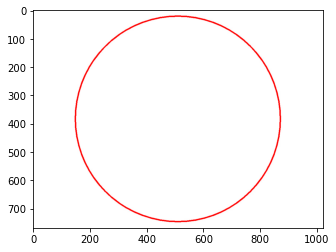

In [14]:
imagg1 = imagg.copy()
inlier = -1
Range1 = [1,10]
for i in range(Range1[0],Range1[1]+1):
    img = np.zeros((X,Y),dtype = np.uint8)
    Centre = Centrep(image)
    r = Rad(Centre)
    rad = int(r)
    Centre = (int(Centre[1]),int(Centre[0]))
    circle1 = cv2.circle(img, (Centre), rad, (255,0,0), 4)
    check = Check(circle1,X,Y)
    In = Inlier(check,pcir)
    pctge = (i - Range1[0]) / (Range1[1] - Range1[0])
    temp = int(round(pBarLength * pctge))
    print("\r"+(temp-1)*'█'+'█'+(pBarLength-temp)*'░'+str(round(pctge*100))+'%'+" For iteration ="+str(i),end=' ')

    if inlier < In: 
        inlier = In
        fitRad = rad
        firCen = Centre
        c = check
circleline= cv2.circle(imagg1, (firCen), fitRad, (255,0,0), 4)
plt.imshow(circleline,cmap = 'gray')
print('done')
print(firCen)

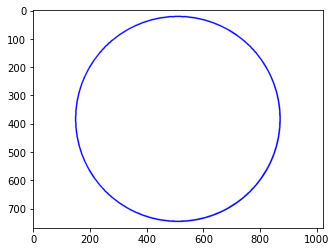

In [15]:
imagg2 = imagg.copy()
img = np.zeros((X,Y),dtype = np.uint8)
img2= cv2.circle(img, (firCen), fitRad, (255,0,0), 4)
pcirnew = []
for i in range(X):
    for j in range(Y):
        if img2[i,j] == 255:
            pcirnew.append([i,j])
NewC = [x for x in c if x in pcirnew]
Mean = Post(NewC)
postcanny = cv2.circle(imagg2, (Mean[1],Mean[0]),Mean[2], (0,0,255), 4)
plt.imshow(postcanny)

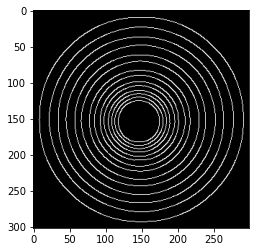

In [16]:
image = cv2.imread('concentric_circles.jpg')
imagg = cv2.imread('concentric_circles.jpg')
t1 = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
t2 = cv2.GaussianBlur(t1,(5,5),7) 
img100 = cv2.Canny(t2, 50, 100)
X = img100.shape[0]
Y = img100.shape[1]
plt.imshow(img100,cmap = 'gray')
pcir = []
for i in range(X):
    for j in range(Y):
        if img100[i,j] == 255:
            pcir.append([i,j])

(194, 213)
82


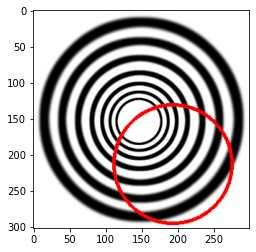

In [17]:
for z in range(0,1):
    Centre = Centrep(image)
    r = Rad(Centre)
    rad = int(r)
    Centre = (int(Centre[1]),int(Centre[0]))
    print(Centre)
    print(rad)
Circle = cv2.circle(image, (Centre), rad, (255,0,0), 4)
plt.imshow(Circle,cmap = 'gray')

██████████████████████████████████████████████████████████████████████100% For iteration =2000 done
(149, 151)


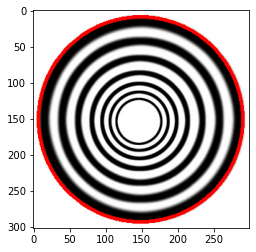

In [20]:
imagg1 = imagg.copy()
inlier = -1
Range2 = [1,2000]
for i in range(Range2[0],Range2[1]+1):
    img = np.zeros((X,Y),dtype = np.uint8)
    Centre = Centrep(image)
    r = Rad(Centre)
    rad = int(r)
    Centre = (int(Centre[1]),int(Centre[0]))
    circle1 = cv2.circle(img, (Centre), rad, (255,0,0), 4)
    check = Check(circle1,X,Y)
    In = Inlier(check,pcir)
    pctge = (i - Range2[0]) / (Range2[1] - Range2[0])
    temp = int(round(pBarLength * pctge))
    print("\r"+(temp-1)*'█'+'█'+(pBarLength-temp)*'░'+str(round(pctge*100))+'%'+" For iteration ="+str(i),end=' ')

    if inlier < In: 
        inlier = In
        fitRad = rad
        firCen = Centre
        c = check
circleline= cv2.circle(imagg1, (firCen), fitRad, (255,0,0), 4)
plt.imshow(circleline,cmap = 'gray')
print('done')
print(firCen)

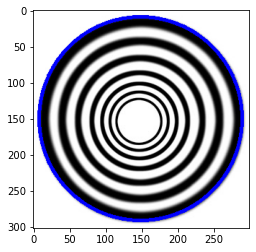

In [22]:
imagg2 = imagg.copy()
img = np.zeros((X,Y),dtype = np.uint8)
img2= cv2.circle(img, (firCen), fitRad, (255,0,0), 4)
pcirnew = []
for i in range(X):
    for j in range(Y):
        if img2[i,j] == 255:
            pcirnew.append([i,j])
NewC = [x for x in c if x in pcirnew]
Mean = Post(NewC)
postcanny = cv2.circle(imagg2, (Mean[1],Mean[0]),Mean[2], (0,0,255), 4)
plt.imshow(postcanny)

in1 = -1
IN = 0
for i in range(Range2[0],Range2[1]+1):
    img = np.zeros((X,Y),dtype = np.uint8)
    BC2 = bettercenter(RAN)
    rad2 = int(radius(BC2,RAN))
    circle2 = cv2.circle(img, (BC2), rad2, (255,0,0), 3)
    check = Check(circle2,X,Y)
    IN = Inlier(check,RAN)
    if in1 < IN: 
        in1 = IN
        fitRad2 = rad2
        fitCen2 = BC2
    if in1 >= 900:
        break

concentric = cv2.imread('concentric_circles.jpg')
Cir2 = cv2.circle(concentric, (fitCen2), fitRad2, (255,0,0), 3)
plt.imshow(Cir2,cmap = 'gray')
print('done')
print(fitCen2)

In [26]:
def Centre1(img):
    a,b,c,d,k1,k2 = 0,0,0,0,0,0
    R = random.sample(pcir,3)
    t1,t2,t3,t4,t5,t6 = R[0][0],R[0][1],R[1][0],R[1][1],R[2][0],R[2][1]
    while (k1 == k2):
        R = random.sample(pcir,3)
        t1,t2,t3,t4,t5,t6 = R[0][0],R[0][1],R[1][0],R[1][1],R[2][0],R[2][1]
        a = (t1-t3)
        b = (t3-t5)
        c = (t2-t4)
        d = (t4-t6)
        while abs(a == 0) or abs(b == 0) or abs(c == 0) or abs(d == 0):
            R = random.sample(pcir,3)
            t1,t2,t3,t4,t5,t6 = R[0][0],R[0][1],R[1][0],R[1][1],R[2][0],R[2][1]
            a = (t1-t3)
            b = (t3-t5)
            c = (t2-t4)
            d = (t4-t6)
        k1 = -1/(c/a)
        k2 = -1/(d/b)
    m1 = (t1+t3)/2
    m2 = (t3+t5)/2
    m3 = (t2+t4)/2
    m4 = (t4+t6)/2
    midp1 = (m1,m3)
    midp2 = (m2,m4)
    k1 = -1/(c/a)
    k2 = -1/(d/b)
    b1 = (m3 - k1*m1)
    b2 = (m4 - k2*m2)
    xp = (b1 - b2)/(k2-k1)
    yp = k1*xp + b1
    cen = (xp,yp)
    return cen

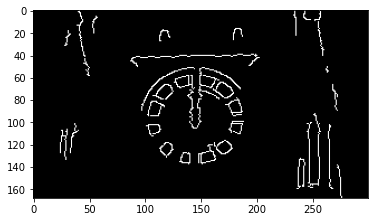

In [27]:
image = cv2.imread('parliament_clock.jpg')
imagg = cv2.imread('parliament_clock.jpg')
t1 = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
t2 = cv2.GaussianBlur(t1,(5,5),7) 
img100 = cv2.Canny(t2, 150, 300)
X = img100.shape[0]
Y = img100.shape[1]
plt.imshow(img100,cmap = 'gray')
pcir = []
for i in range(X):
    for j in range(Y):
        if img100[i,j] == 255:
            pcir.append([i,j])

(243, 59)
211


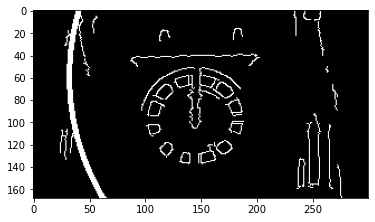

In [28]:
for z in range(0,1):
    Centre = Centre1(image)
    r = Rad(Centre)
    rad = int(r)
    Centre = (int(Centre[1]),int(Centre[0]))
    print(Centre)
    print(rad)
Circle = cv2.circle(img100, (Centre), rad, (255,0,0), 4)
plt.imshow(Circle,cmap = 'gray')

██████████████████████████████████████████████████████████████████████100% For iteration =300 done
(145, 102)


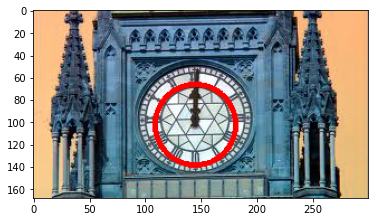

In [29]:
rang = [1,300]
imagg1 = imagg.copy()
inlier = -1
for i in range(rang[0],rang[1]+1):
    img = np.zeros((X,Y),dtype = np.uint8)
    Centre = Centre1(image)
    r = Rad(Centre)
    rad = int(r)
    Centre = (int(Centre[1]),int(Centre[0]))
    circle1 = cv2.circle(img, (Centre), rad, (255,0,0), 4)
    check = Check(circle1,X,Y)
    In = Inlier(check,pcir)
    pctge = (i - rang[0]) / (rang[1] - rang[0])
    temp = int(round(pBarLength * pctge))
    print("\r"+(temp-1)*'█'+'█'+(pBarLength-temp)*'░'+str(round(pctge*100))+'%'+" For iteration ="+str(i),end=' ')

    if inlier < In: 
        inlier = In
        fitRad = rad
        firCen = Centre
        c = check
circleline= cv2.circle(imagg1, (firCen), fitRad, (255,0,0), 4)
plt.imshow(circleline,cmap = 'gray')
print('done')
print(firCen)

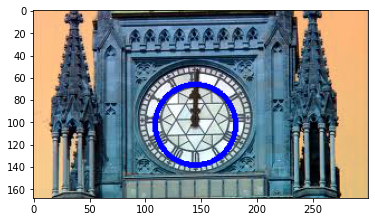

In [30]:
imagg2 = imagg.copy()
img = np.zeros((X,Y),dtype = np.uint8)
img2= cv2.circle(img, (firCen), fitRad, (255,0,0), 4)
pcirnew = []
for i in range(X):
    for j in range(Y):
        if img2[i,j] == 255:
            pcirnew.append([i,j])
NewC = [x for x in c if x in pcirnew]
Mean = Post(NewC)
postcanny = cv2.circle(imagg2, (Mean[1],Mean[0]),Mean[2], (0,0,255), 4)
plt.imshow(postcanny)